# Importando as bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

# Etapa 1

In [ ]:
df = pd.read_csv('data/abalone.csv',sep=';',decimal=',')

df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Nossas colunas: 
*   Sex / nominal / -- / M, F, and I (infant)
*   Length / continuous / mm / Longest shell measurement
*   Diameter / continuous / mm / perpendicular to length
*   Height / continuous / mm / with meat in shell
*   Whole weight / continuous / grams / whole abalone
*   Shucked weight / continuous / grams / weight of meat
*   Viscera weight / continuous / grams / gut weight (after bleeding)
*   Shell weight / continuous / grams / after being dried
*   Rings / integer / -- / +1.5 gives the age in years



---


Nós temos 4177 observações. N = 4177 



Nossas variáveis ​​preditoras D = 'LongestShell', 'Diameter', 'Height' 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight' e 'Rings'.

Número de classes L = 'Sex' 








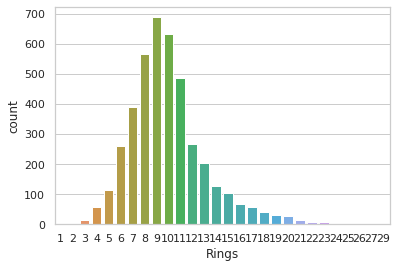

In [ ]:
fig = plt.plot()
sns_plot = sns.countplot(x='Rings', data=df)

In [ ]:
#Transformando os atributos categóricos
"""
Infantil - 0
Masculino - 1
Feminino - 2
"""
df.loc[df['Type'] == 'I',['Type']] = 1
df.loc[df['Type'] == 'M',['Type']] = 2
df.loc[df['Type'] == 'F',['Type']] = 3

# Etapa 2

In [ ]:
df.columns

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

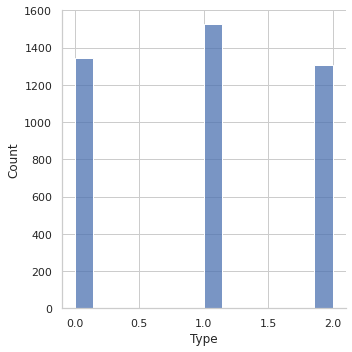

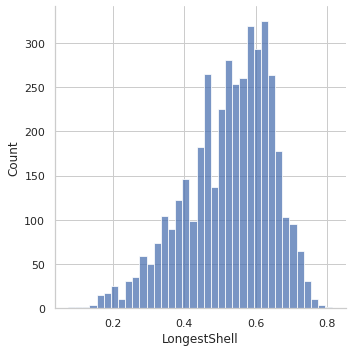

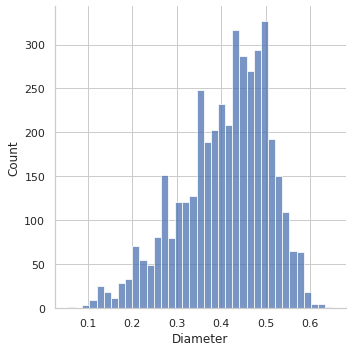

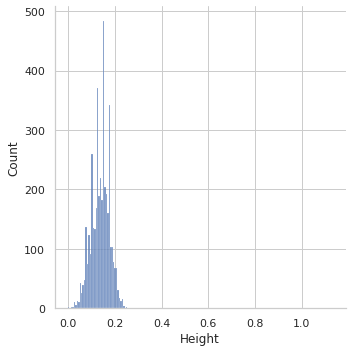

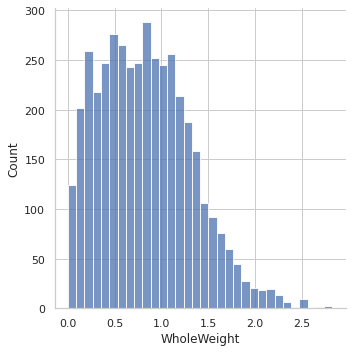

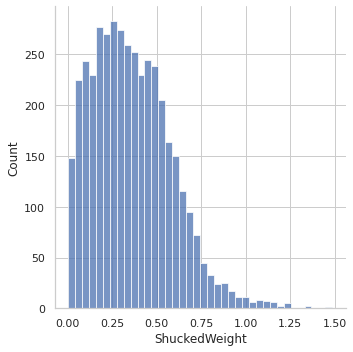

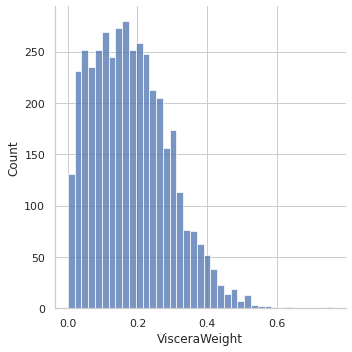

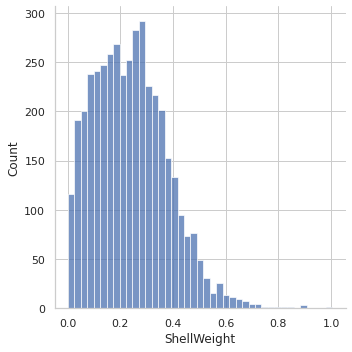

In [ ]:
for i in df.drop(columns=['Rings']).columns:
  sns.displot(df, x=i)

In [ ]:
#Média
df.drop(columns='Rings').mean()

Type             0.991621
LongestShell     0.523992
Diameter         0.407881
Height           0.139516
WholeWeight      0.828742
ShuckedWeight    0.359367
VisceraWeight    0.180594
ShellWeight      0.238831
dtype: float64

In [ ]:
#Desvio Padrão
df.drop(columns='Rings').std() 

Type             0.796410
LongestShell     0.120093
Diameter         0.099240
Height           0.041827
WholeWeight      0.490389
ShuckedWeight    0.221963
VisceraWeight    0.109614
ShellWeight      0.139203
dtype: float64

In [ ]:
#Assimetria
df.drop(columns='Rings').skew()

Type             0.014980
LongestShell    -0.639873
Diameter        -0.609198
Height           3.128817
WholeWeight      0.530959
ShuckedWeight    0.719098
VisceraWeight    0.591852
ShellWeight      0.620927
dtype: float64

# Parte 2

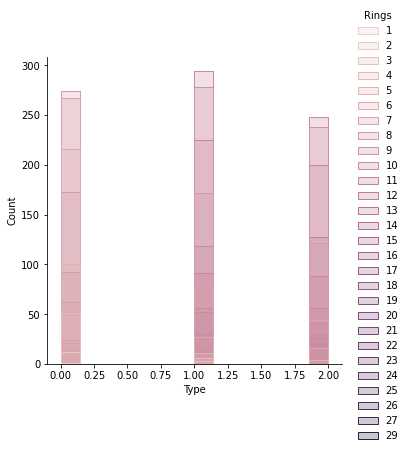

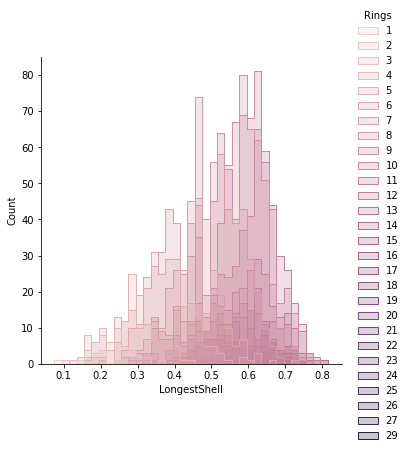

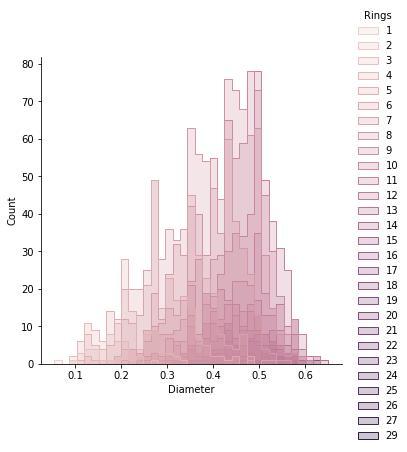

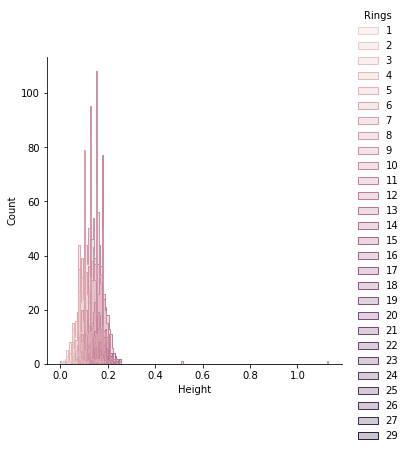

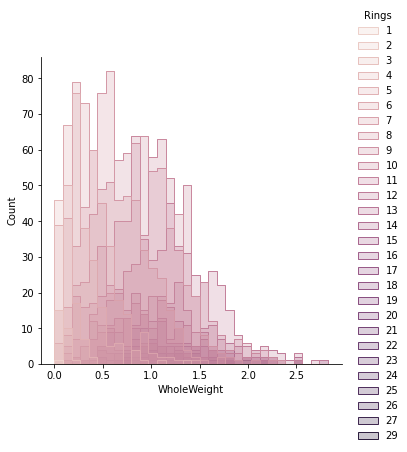

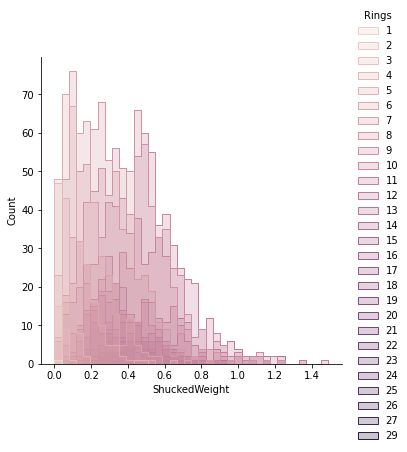

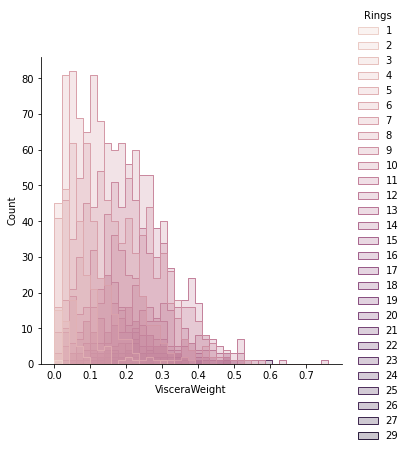

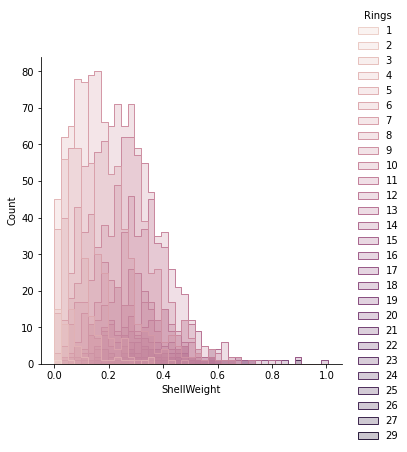

In [ ]:
for i in df.drop(columns=['Rings']).columns:
  sns.displot(df, x=i, hue="Rings", element="step")

In [ ]:
df.groupby('Rings').mean()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Rings,,,,,,,
1,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


In [ ]:
#Desvio Padrão da classe em relação aos preditores
df.groupby('Rings').std() 

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Rings,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.034754,0.024014,0.011443,0.015851,0.007824,0.003406,0.004379
4,0.049839,0.038593,0.017262,0.038436,0.016766,0.008613,0.012419
5,0.060659,0.047327,0.017270,0.075864,0.065109,0.016693,0.020341
6,0.075215,0.060436,0.022346,0.179586,0.086183,0.038566,0.050190
7,0.076018,0.061779,0.022607,0.224239,0.111397,0.050590,0.056666
8,0.079221,0.064936,0.048914,0.296128,0.145127,0.067768,0.075504
9,0.082891,0.067655,0.026542,0.361927,0.182417,0.083849,0.091707


In [ ]:
#Assimetria
df.groupby('Rings').skew()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Rings,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.672082,-0.103311,0.234069,0.310130,1.018614,1.225454,0.744023,0.210016
4,2.642534,0.397116,0.463112,0.103481,1.248144,1.300660,0.979503,1.402885
5,2.857848,0.205686,0.325723,-0.169655,1.174446,4.425203,1.223094,0.983507
6,2.344592,0.346553,0.432976,0.417476,2.160383,2.045093,2.149837,2.441079
7,1.306622,0.221603,0.226548,0.534282,1.322841,1.348959,1.426389,1.446208
8,0.514265,-0.248867,-0.260390,15.144290,0.566910,0.591071,0.657443,0.568420
9,-0.161986,-0.629872,-0.629448,-0.219201,0.329577,0.521533,0.447700,0.280602


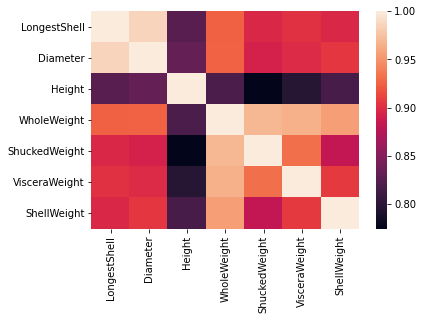

In [ ]:
corr = df.drop(columns='Rings').corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "15pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "15pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '15pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '15pt'})\
    .set_caption("Matriz de Correlação")\
    .set_precision(2)\
    .set_table_styles(magnify())

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
LongestShell,1.00,0.99,0.83,0.93,0.90,0.90,0.90
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82
WholeWeight,0.93,0.93,0.82,1.00,0.97,0.97,0.96
ShuckedWeight,0.90,0.89,0.77,0.97,1.00,0.93,0.88
VisceraWeight,0.90,0.90,0.80,0.97,0.93,1.00,0.91
ShellWeight,0.90,0.91,0.82,0.96,0.88,0.91,1.00


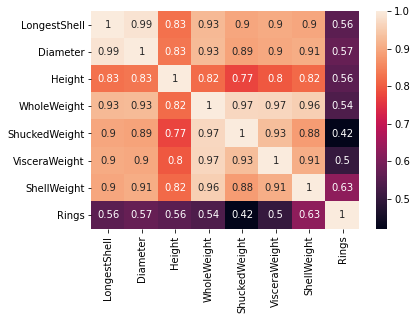

In [ ]:
sns.heatmap(df.corr(), annot=True)

# Identificar Outliers



In [ ]:
df.columns

Index(['Type', 'LongestShell', 'Diameter', 'Height', 'WholeWeight',
       'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
      dtype='object')

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5
43,0,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.012,5
44,0,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.015,4
58,0,0.245,0.190,0.060,0.0860,0.0420,0.0140,0.025,4
125,0,0.270,0.195,0.060,0.0730,0.0285,0.0235,0.030,5
...,...,...,...,...,...,...,...,...,...
3994,0,0.185,0.135,0.045,0.0320,0.0110,0.0065,0.010,4
3995,0,0.245,0.175,0.055,0.0785,0.0400,0.0180,0.020,5
4023,0,0.275,0.200,0.070,0.0960,0.0370,0.0225,0.030,6
4148,1,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.355,11


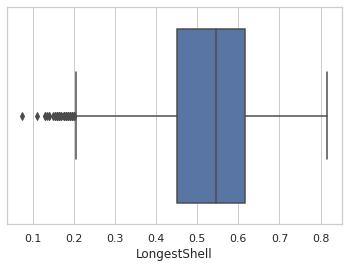

In [ ]:
#Detectar outliers
desvio_padrao = df['LongestShell'].std()
media = df['LongestShell'].mean()
display(df.loc[(df['LongestShell'] > media + 2*desvio_padrao) | (df['LongestShell'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['LongestShell'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5
43,0,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,0,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
58,0,0.245,0.190,0.060,0.0860,0.0420,0.0140,0.0250,4
125,0,0.270,0.195,0.060,0.0730,0.0285,0.0235,0.0300,5
...,...,...,...,...,...,...,...,...,...
3963,0,0.270,0.205,0.075,0.1180,0.0590,0.0310,0.0305,4
3964,0,0.270,0.190,0.060,0.0990,0.0445,0.0170,0.0300,5
3994,0,0.185,0.135,0.045,0.0320,0.0110,0.0065,0.0100,4
3995,0,0.245,0.175,0.055,0.0785,0.0400,0.0180,0.0200,5


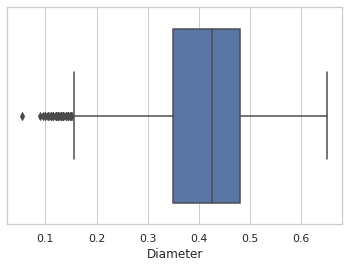

In [ ]:
desvio_padrao = df['Diameter'].std()
media = df['Diameter'].mean()
display(df.loc[(df['Diameter'] > media + 2*desvio_padrao) | (df['Diameter'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['Diameter'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5
43,0,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,0,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
148,0,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5
164,2,0.650,0.545,0.230,1.7520,0.5605,0.2895,0.8150,16
...,...,...,...,...,...,...,...,...,...
3993,1,0.720,0.600,0.235,2.2385,0.9840,0.4110,0.6210,12
3994,0,0.185,0.135,0.045,0.0320,0.0110,0.0065,0.0100,4
3995,0,0.245,0.175,0.055,0.0785,0.0400,0.0180,0.0200,5
3996,0,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6


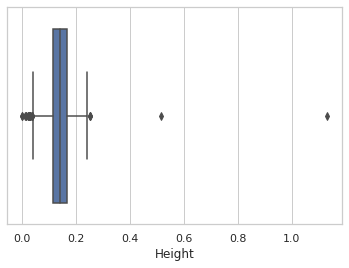

In [ ]:
desvio_padrao = df['Height'].std()
media = df['Height'].mean()
display(df.loc[(df['Height'] > media + 2*desvio_padrao) | (df['Height'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['Height'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
129,1,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
163,2,0.725,0.560,0.210,2.1410,0.6500,0.3980,1.005,18
165,1,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.725,14
166,2,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.850,20
167,2,0.680,0.570,0.205,1.8420,0.6250,0.4080,0.650,20
...,...,...,...,...,...,...,...,...,...
4057,2,0.690,0.535,0.185,1.8260,0.7970,0.4090,0.499,11
4103,1,0.700,0.545,0.215,1.9125,0.8825,0.4385,0.506,10
4104,2,0.710,0.545,0.175,1.9070,0.8725,0.4565,0.475,11
4148,1,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.355,11


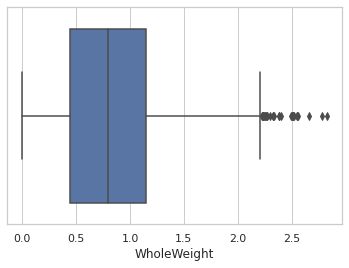

In [ ]:
desvio_padrao = df['WholeWeight'].std()
media = df['WholeWeight'].mean()
display(df.loc[(df['WholeWeight'] > media + 2*desvio_padrao) | (df['WholeWeight'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['WholeWeight'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
33,2,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.4550,19
165,1,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14
168,1,0.705,0.560,0.220,1.9810,0.8175,0.3085,0.7600,14
358,1,0.745,0.585,0.215,2.4990,0.9265,0.4720,0.7000,17
882,1,0.655,0.580,0.205,2.0805,0.9590,0.3415,0.6010,17
...,...,...,...,...,...,...,...,...,...
4058,2,0.695,0.560,0.185,1.7715,0.8195,0.3310,0.4370,10
4103,1,0.700,0.545,0.215,1.9125,0.8825,0.4385,0.5060,10
4104,2,0.710,0.545,0.175,1.9070,0.8725,0.4565,0.4750,11
4105,2,0.715,0.565,0.180,1.7900,0.8440,0.3535,0.5385,9


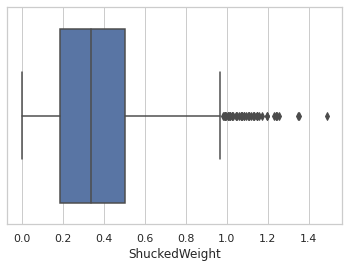

In [ ]:
desvio_padrao = df['ShuckedWeight'].std()
media = df['ShuckedWeight'].mean()
display(df.loc[(df['ShuckedWeight'] > media + 2*desvio_padrao) | (df['ShuckedWeight'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['ShuckedWeight'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
34,2,0.705,0.550,0.200,1.7095,0.6330,0.4115,0.490,13
165,1,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.725,14
166,2,0.725,0.575,0.175,2.1240,0.7650,0.4515,0.850,20
167,2,0.680,0.570,0.205,1.8420,0.6250,0.4080,0.650,20
169,2,0.680,0.515,0.175,1.6185,0.5125,0.4090,0.620,12
...,...,...,...,...,...,...,...,...,...
4103,1,0.700,0.545,0.215,1.9125,0.8825,0.4385,0.506,10
4104,2,0.710,0.545,0.175,1.9070,0.8725,0.4565,0.475,11
4106,2,0.720,0.590,0.205,1.7495,0.7755,0.4225,0.480,11
4146,1,0.695,0.530,0.210,1.5100,0.6640,0.4095,0.385,10


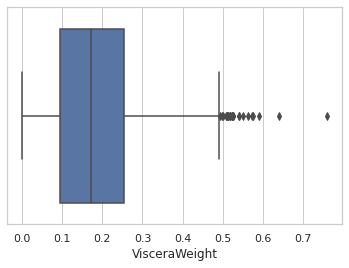

In [ ]:
desvio_padrao = df['VisceraWeight'].std()
media = df['VisceraWeight'].mean()
display(df.loc[(df['VisceraWeight'] > media + 2*desvio_padrao) | (df['VisceraWeight'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['VisceraWeight'])

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
81,1,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.6750,12
83,1,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.5800,21
128,1,0.700,0.535,0.160,1.7255,0.6300,0.2635,0.5400,19
129,1,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18
157,1,0.645,0.485,0.215,1.5140,0.5460,0.2615,0.6350,16
...,...,...,...,...,...,...,...,...,...
3987,2,0.655,0.545,0.185,1.7590,0.6865,0.3130,0.5470,11
3992,1,0.700,0.600,0.230,2.0030,0.8105,0.4045,0.5755,10
3993,1,0.720,0.600,0.235,2.2385,0.9840,0.4110,0.6210,12
4105,2,0.715,0.565,0.180,1.7900,0.8440,0.3535,0.5385,9


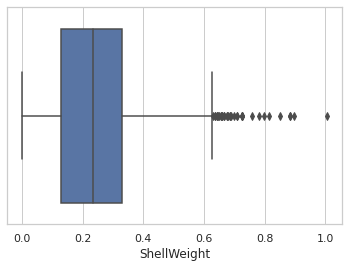

In [ ]:
desvio_padrao = df['ShellWeight'].std()
media = df['ShellWeight'].mean()
display(df.loc[(df['ShellWeight'] > media + 2*desvio_padrao) | (df['ShellWeight'] < media - 2*desvio_padrao),:])
sns.boxplot(x=df['ShellWeight'])

# Criação do modelo

  Nessa etapa, vamos criar o nosso modelo, depois de tirar alguns insights do nossos dados. <br>
O primeiro passo que vamos fazer é dividir o nosso dataset entre treino e teste, a fim de criarmos o nosso modelo usando os dados de treino e valida-lo usando os dados de teste. Desse modo, quando dividimos o nosso dataset, normalizamos o nosso dados. Essa operação consiste em:<br><br>
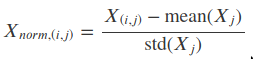
<br><br>Assim, podemos centralizar o nosso espaço de dados e deixar todos os nossos atributos na mesma unidade de medida e podendo diminuir os intervalos dos atributos. E, fazemos esse mesmo procedimento para o dados de teste, usando as médias e o desvios padrão do nossos dataset de treino. <br><br>


In [ ]:
from sklearn.model_selection import train_test_split
x, y = df.drop(columns=['Rings']).copy(), df['Rings'].copy()
#y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#padronização dos dados 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Padronizando os dados de treino
X_train = sc.fit_transform(X_train)

#Padronizando os dados de teste, conforme os dados de treino
X_test = sc.transform (X_test)

## Questão 1

Use os preditores transformados no conjunto de treinamento para aprender uma revisão linear comum modelo gression e teste o modelo usando o conjunto de teste (lembre-se de aplicar o mesmopré-processamento que você usou no conjunto de treinamento). Compare o desempenho do modeloobtido no conjunto de teste com as estimativas que você obteria usando uma reamostragemesquema como validação cruzada de 5 ou 10 vezes: use o RMSE e R 2 . <br><br>
### Resposta
A primeira parte foi analisar um modelo usando uma regressão simples. **Descrever um pouco a regressão linear comum** <br><br> Assim, pegamos o nosso conjunto de treino e fizemos o metódo de cross validation **(Comentar um pouco do que é o cross-validation)** com 10 folds. Em cada repetição, verificamos o R2 score e o RMSE **(Comentar um pouquinho o que cada métrica corresponde)** e anotamos a cada repetição. Por fim, tiramos a média do nosso modelo e testamos ele no nosso dataset de teste. As medidas pareceram muito

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=10)
resultsr2 = []
resultsrmse = []
cont = 1
for train_index, test_index in kf.split(X_train):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cross, X_test_cross = X_train[train_index], X_train[test_index]
  y_train_cross, y_test_cross = y_train.iloc[train_index], y_train.iloc[test_index]

  model = LinearRegression()
  model.fit(X_train_cross, y_train_cross)

  y_pred = model.predict(X_test_cross)
  r2 = r2_score(y_test_cross, y_pred)
  resultsr2.append(r2)
  print('KFold {}'.format(cont))
  print("Valor do R2: {}".format(r2))
  RMSE = mean_squared_error(y_test_cross, y_pred,squared=False)
  resultsrmse.append(RMSE)
  print("Valor do RMSE: {}\n".format(RMSE))
  cont+=1

KFold 1
Valor do R2: 0.4198177635084652
Valor do RMSE: 2.543641263800259

KFold 2
Valor do R2: 0.5391085785750653
Valor do RMSE: 2.435371781329064

KFold 3
Valor do R2: 0.6518130217521143
Valor do RMSE: 1.8706767296744407

KFold 4
Valor do R2: 0.44515057573391537
Valor do RMSE: 2.403214686252962

KFold 5
Valor do R2: 0.568037538190872
Valor do RMSE: 2.022725563098375

KFold 6
Valor do R2: 0.4987851251000356
Valor do RMSE: 2.3622274653576305

KFold 7
Valor do R2: 0.4614093855709165
Valor do RMSE: 2.426734614835632

KFold 8
Valor do R2: 0.6251033150823979
Valor do RMSE: 1.9365745769839637

KFold 9
Valor do R2: 0.52570977021525
Valor do RMSE: 2.2888468599944116

KFold 10
Valor do R2: 0.4709330014293587
Valor do RMSE: 2.0796478838835255



Text(0.5, 1.0, 'Como o modelo se saiu em cada Fold')

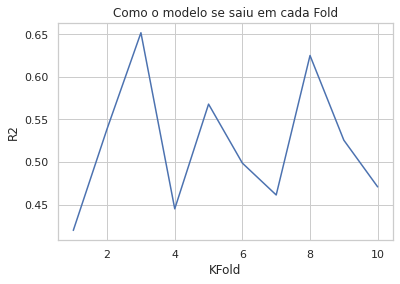

In [ ]:
aa = [1,2,3,4,5,6,7,8,9,10]
plt.plot(aa, resultsr2)
plt.xlabel('KFold')
plt.ylabel('R2')
plt.title('Como o modelo se saiu em cada Fold')

Text(0.5, 1.0, 'Como o modelo se saiu em cada Fold')

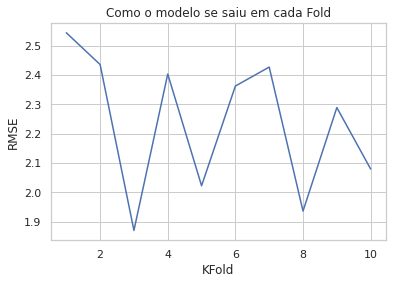

In [ ]:
plt.plot(aa, resultsrmse)
plt.xlabel('KFold')
plt.ylabel('RMSE')
plt.title('Como o modelo se saiu em cada Fold')

In [ ]:
mediar2 = np.mean(resultsr2)
mediarmse = np.mean(resultsrmse)
print("No treino:\nValor médio do R2: {}\nValor médio do RMSE: {}".format(mediar2, mediarmse))

No treino:
Valor médio do R2: 0.5205868075158391
Valor médio do RMSE: 2.2369661425210263


In [ ]:
#Usando os nossos dados de treino para construir o modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred,squared=False)
print('Visualizar como os nosso modelo se sai com os dados de teste:\n')
print('R2: {}\nRMSE: {}\n'.format(r2, RMSE))

Visualizar como os nosso modelo se sai com os dados de teste:

R2: 0.5174659639277195
RMSE: 2.2027336421649606



---



## Questão 2

 Use os preditores transformados no conjunto de treinamento para aprender um método linear penalizado L2 modelo de regressão e teste o modelo usando o conjunto de teste (lembre-se de aplicar o mesmo pré-processamento que você usou no conjunto de treinamento). Determine o valor ideal de λ usando uma validação cruzada de 5 ou 10 vezes com base no RMSE (você só pode usar o treinamento definido nesta fase, e seu espaço de pesquisa λ deve consistir em pelo menos 10 valores). Relatório sobre o processo (mostrar o perfil de validação cruzada, tanto nos termos do RMSE e R2). Relate a precisão (RMSE e R2) obtida no conjunto de teste.<br><br>


---


#### Ridge (ou L2)
![1__2_bFm9NkDrOmfOYs5lNFA.png](https://miro.medium.com/max/530/1*_2_bFm9NkDrOmfOYs5lNFA.png)

<h4>Tem que parafrasear o texto abaixo:</h4>
Nesse modelo, a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos. Qual será o efeito dessa regularização nos coeficientes de duas features altamente correlacionadas? Poderíamos ter duas features com coeficientes parecidos, ou uma com coeficiente alto, e outra com coeficiente zero. Como a penalização L2 é desproporcionalmente maior para coeficientes maiores, a regularização Ridge faz com que features correlacionadas tenham coeficientes parecidos.
No entanto, essa regularização não diminui a susceptibilidade do modelo a outliers, de forma que é recomendável limpar o dataset e remover features desnecessárias antes de realizar esse tipo de regressão.
Em termos matemáticos, a penalidade L1 não é diferenciável, o que pode complicar a sua implementação. Já a L2 é diferenciável, o que significa que ela pode ser usada em abordagens baseadas em gradiente.

In [ ]:
from sklearn.linear_model import Ridge
passo = 0.1
alpha = passo
r_r2 = []
r_rmse = []
aux = []
for i in range(1, 11):
  print("{}° vez - Alpha = {}".format(i, alpha))
  ridge = Ridge(alpha = alpha)
  aux.append(alpha)
  rmse = np.mean((-1*cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))**0.5)
  r2 = np.mean(cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2'))
  r_r2.append(r2)
  r_rmse.append(rmse)
  print('Utilizando 10 Folds:\n')
  print('R2 Médio: ', r2)
  print('RMSE MédiO: ', rmse)
  alpha+=passo
  print()

1° vez - Alpha = 0.1
Utilizando 10 Folds:

R2 Médio:  0.5206089659933484
RMSE MédiO:  2.2369259594582256

2° vez - Alpha = 0.2
Utilizando 10 Folds:

R2 Médio:  0.5206295112886644
RMSE MédiO:  2.2368893274963755

3° vez - Alpha = 0.30000000000000004
Utilizando 10 Folds:

R2 Médio:  0.5206484939384219
RMSE MédiO:  2.236856134761993

4° vez - Alpha = 0.4
Utilizando 10 Folds:

R2 Médio:  0.5206659627797973
RMSE MédiO:  2.236826273115505

5° vez - Alpha = 0.5
Utilizando 10 Folds:

R2 Médio:  0.520681965014905
RMSE MédiO:  2.2367996380118504

6° vez - Alpha = 0.6
Utilizando 10 Folds:

R2 Médio:  0.520696546272448
RMSE MédiO:  2.2367761283669134

7° vez - Alpha = 0.7
Utilizando 10 Folds:

R2 Médio:  0.5207097506667371
RMSE MédiO:  2.2367556464295335

8° vez - Alpha = 0.7999999999999999
Utilizando 10 Folds:

R2 Médio:  0.5207216208542214
RMSE MédiO:  2.236738097658814

9° vez - Alpha = 0.8999999999999999
Utilizando 10 Folds:

R2 Médio:  0.52073219808763
RMSE MédiO:  2.236723390606504

10° vez 

Text(0, 0.5, 'R2')

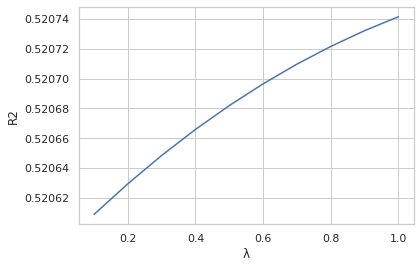

In [ ]:
plt.plot(aux, r_r2)
plt.xlabel('λ')
plt.ylabel('R2')

Text(0, 0.5, 'RMSE')

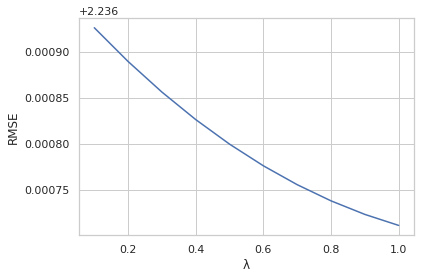

In [ ]:
plt.plot(aux, r_rmse)
plt.xlabel('λ')
plt.ylabel('RMSE')

In [ ]:
#Usando os nossos dados de Teste
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred,squared=False)
print('Visualizar como os nosso modelo se sai com os dados de treino:\n')
print('R2: {}\nRMSE: {}\n'.format(r2, RMSE))

Visualizar como os nosso modelo se sai com os dados de treino:

R2: 0.5174475031191385
RMSE: 2.2027757779027084





---



## Questão 3

 Use os preditores transformados no conjunto de treinamento para aprender um PLS ou um PCR modelo de regressão e teste o modelo usando o conjunto de teste (lembre-se de aplicar o mesmo pré-processamento que você usou no conjunto de treinamento). Determine o número ideal de componentes usando uma validação cruzada de 5 ou 10 vezes com base no RMSE (você pode usar apenas o conjunto de treinamento nesta fase). Relatório sobre o processo (mostrar a validação cruzada perfil, tanto em termos de RMSE e R2). Relate a precisão (RMSE e R2) obtido no conjunto de teste.
 
 ----

 ### Lasso (ou L1) 
![imagem_lasso](https://miro.medium.com/max/535/1*dynW6DLJxX2iaMrnfgxk_A.png)<br>
Além de diminuir a variância do modelo, essa regularização tem uma outra importante aplicação em machine learning. Quando há múltiplas features altamente correlacionadas (ou seja, features que se comportam da mesma maneira) a regularização Lasso seleciona apenas uma dessas features e zera os coeficientes das outras, de forma a minimizar a penalização L1. Desse modo, dizemos que esse modelo realiza feature selection automaticamente, gerando vários coeficientes com peso zero, ou seja, que são ignorados pelo modelo. Isso facilita a interpretação do modelo, o que é uma enorme vantagem.


In [ ]:
from sklearn.model_selection import train_test_split
x, y = df.drop(columns=['Rings']).copy(), df['Rings'].copy()
#y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
#padronização dos dados 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Padronizando os dados de treino
X_train = sc.fit_transform(X_train)
#Padronizando os dados de teste, conforme os dados de treino
X_test = sc.transform (X_test)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
pca = PCA()
X_reduced = pca.fit_transform(X_train)
num_colunas = X_train.shape[1]
lasso = Lasso(random_state=42, alpha=0.1)
r_r2 = []
r_rmse = []
for i in range(1, num_colunas+1, 1):
  print("Usando {} componentes principais\n".format(i))
  r2 = np.mean(cross_val_score(lasso, X_reduced[:,:i], y_train, cv=10, scoring='r2'))
  print('R2 médio: ', r2)
  r_r2.append(r2)
  rmse = np.mean((-1*cross_val_score(lasso, X_reduced[:,:i], y_train, cv=10, scoring='neg_mean_squared_error'))**0.5)
  print('RMSE médio: ', rmse)
  r_rmse.append(rmse)
  print()

Usando 1 componentes principais

R2 médio:  0.3359223132753144
RMSE médio:  2.636536099513773

Usando 2 componentes principais

R2 médio:  0.34047407437072497
RMSE médio:  2.6279884374440625

Usando 3 componentes principais

R2 médio:  0.3307518597018312
RMSE médio:  2.640785948572719

Usando 4 componentes principais

R2 médio:  0.3316540109842408
RMSE médio:  2.638985855417803

Usando 5 componentes principais

R2 médio:  0.486868269062664
RMSE médio:  2.3163735072426603

Usando 6 componentes principais

R2 médio:  0.486868269062664
RMSE médio:  2.3163735072426603

Usando 7 componentes principais

R2 médio:  0.486868269062664
RMSE médio:  2.3163735072426603

Usando 8 componentes principais

R2 médio:  0.486868269062664
RMSE médio:  2.3163735072426603



Text(0, 0.5, 'R2')

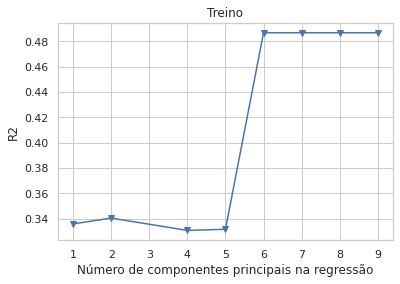

In [ ]:
xx = [1,2,4,5,6,7,8, 9]
plt.plot(xx, r_r2, '-v')
plt.title('Treino')
plt.xlabel('Número de componentes principais na regressão')
plt.ylabel('R2')

Text(0, 0.5, 'RMSE')

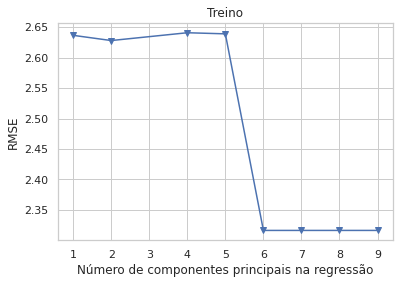

In [ ]:
plt.plot(xx, r_rmse, '-v')
plt.title('Treino')
plt.xlabel('Número de componentes principais na regressão')
plt.ylabel('RMSE')

#### O número ideal é a partir de 5 componentes, haja visto que o modelo passa a ter as métricas R2 e RMSE constantes

In [ ]:
#A partir da quarta componente, temos as mesmas métricas. Vamos ver como o teste se sai.
pca = PCA()
z = pca.fit(X_test)
X_reduced_test = z.transform(X_test)
model = Lasso(random_state=42, alpha=0.1)
model.fit(X_reduced[:,:6], y_train)
y_pred = model.predict(X_reduced_test[:,:6])
r2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred,squared=False)
print('Visualizar como os nosso modelo se sai com os dados de teste:\n')
print('R2: {}\nRMSE: {}\n'.format(r2, RMSE))

Visualizar como os nosso modelo se sai com os dados de teste:

R2: 0.41326336625234295
RMSE: 2.4289557952614147

